### Training the ST RES NET with MITBIH / Apnea-ecg datasets

Sampling frequency in Apnea-ecg is 100 Hz, whereas in the MITBIH it is 360 Hz. Therefore the MITBIH dataset was downsampled using resample_signal and downsample_r_peaks_probability (customLib/preprocess.py).

In [2]:
import numpy as np
from customLib.vis import plot_ecg
from customLib.dataset import read_dataset
from customLib.config import apnea_ecg_path, mitbih_path
from models.models import ST_RES_NET

In [10]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(mitbih_path + "\\dataset", is_validation_set=True)

In [13]:
x_train = np.expand_dims(x_train, 1)[:8000]
y_train = np.expand_dims(y_train, 1)[:8000]

x_test = np.expand_dims(x_test, 1)[:2000]
y_test = np.expand_dims(y_test, 1)[:2000]

x_val = np.expand_dims(x_val, 1)[:1000]
y_val = np.expand_dims(y_val, 1)[:1000]

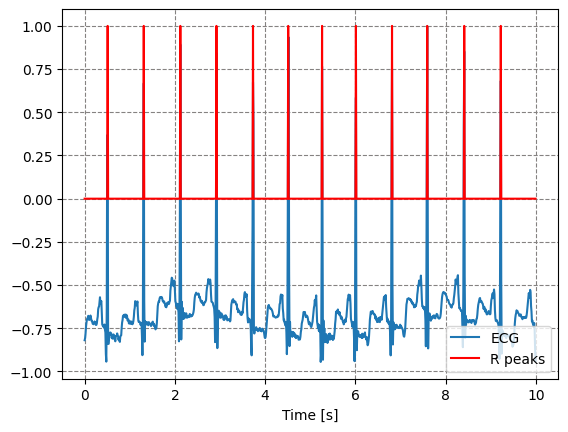

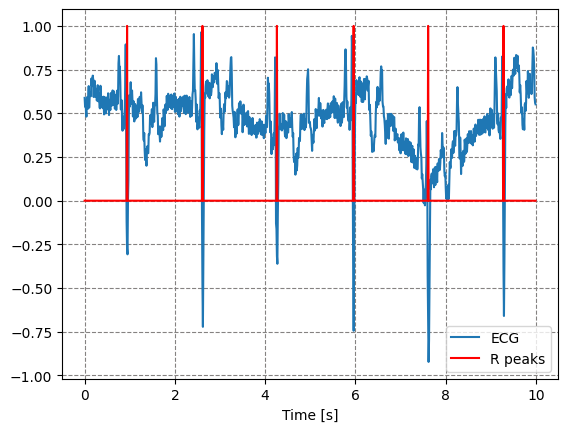

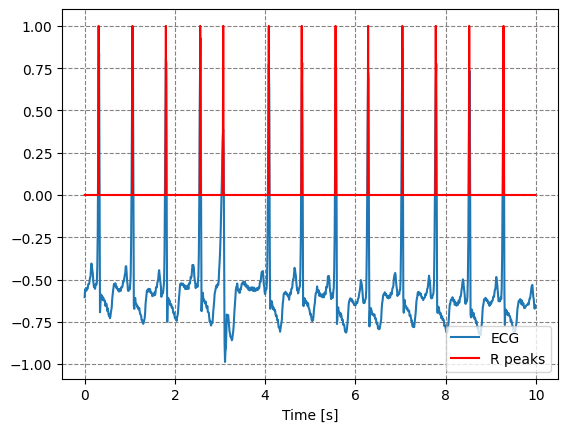

In [14]:
plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 100)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 100)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 100)

In [7]:
model = ST_RES_NET(learning_rate=1e-4)

Training will be performed with: cuda:0


In [15]:
model.train_model(x_train=x_train, y_train=y_train, epochs=10, x_val=x_val, y_val=y_val, batch_size=10)

100%|██████████| 800/800 [01:25<00:00,  9.40it/s]


====Epoch [1/10]====

Train Loss: 0.0043
Train Accuracy: 95.93687 %
Train F1 Score: 0.19848
Train TPR: 0.95937
Train FPR: 0.08943



100%|██████████| 100/100 [00:01<00:00, 53.81it/s]



Validation Loss: 0.0038
Validation Accuracy: 95.74781 %
Validation F1 Score: 0.25924
Validation TPR: 0.95748
Validation FPR: 0.07102



100%|██████████| 800/800 [01:24<00:00,  9.45it/s]


====Epoch [2/10]====

Train Loss: 0.0035
Train Accuracy: 96.87309 %
Train F1 Score: 0.22618
Train TPR: 0.96873
Train FPR: 0.07654



100%|██████████| 100/100 [00:01<00:00, 52.36it/s]



Validation Loss: 0.0036
Validation Accuracy: 96.99481 %
Validation F1 Score: 0.26017
Validation TPR: 0.96995
Validation FPR: 0.07176



100%|██████████| 800/800 [01:25<00:00,  9.32it/s]


====Epoch [3/10]====

Train Loss: 0.0034
Train Accuracy: 97.11614 %
Train F1 Score: 0.23018
Train TPR: 0.97116
Train FPR: 0.07503



100%|██████████| 100/100 [00:02<00:00, 36.44it/s]



Validation Loss: 0.0033
Validation Accuracy: 98.00945 %
Validation F1 Score: 0.26302
Validation TPR: 0.98009
Validation FPR: 0.07158



100%|██████████| 800/800 [01:25<00:00,  9.35it/s]


====Epoch [4/10]====

Train Loss: 0.0033
Train Accuracy: 97.29052 %
Train F1 Score: 0.23580
Train TPR: 0.97291
Train FPR: 0.07285



100%|██████████| 100/100 [00:01<00:00, 51.20it/s]



Validation Loss: 0.0033
Validation Accuracy: 97.88552 %
Validation F1 Score: 0.26708
Validation TPR: 0.97886
Validation FPR: 0.06999



  4%|▍         | 34/800 [00:03<01:29,  8.60it/s]


KeyboardInterrupt: 

  0%|          | 0/200 [00:00<?, ?it/s]

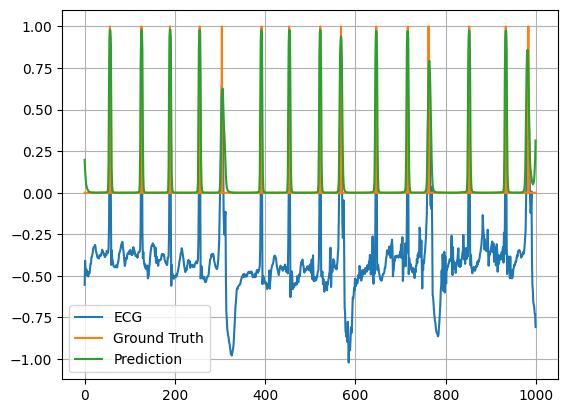

 10%|▉         | 19/200 [00:00<00:03, 49.63it/s]

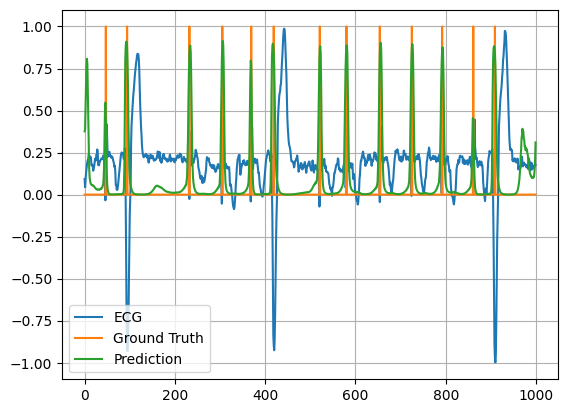

 18%|█▊        | 37/200 [00:00<00:03, 44.38it/s]

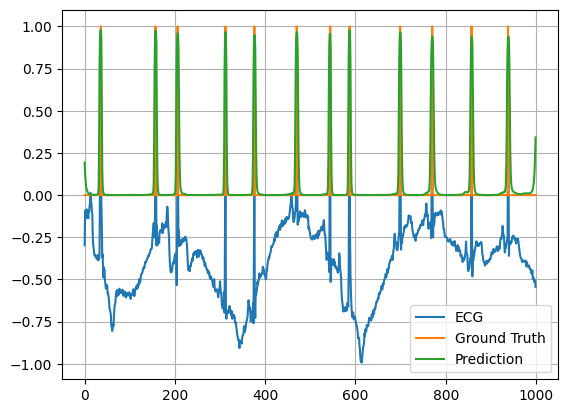

 30%|██▉       | 59/200 [00:01<00:03, 44.14it/s]

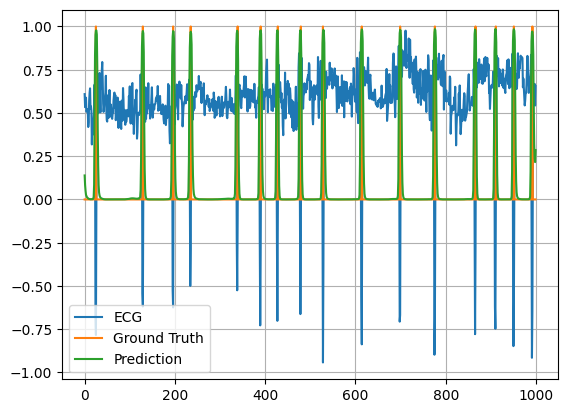

 40%|████      | 80/200 [00:02<00:02, 42.59it/s]

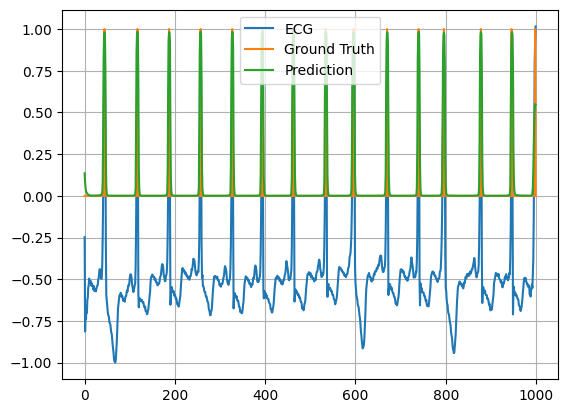

 48%|████▊     | 95/200 [00:02<00:02, 36.93it/s]

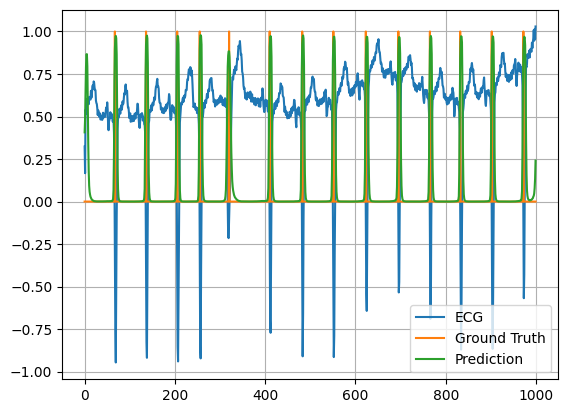

 60%|█████▉    | 119/200 [00:03<00:01, 44.14it/s]

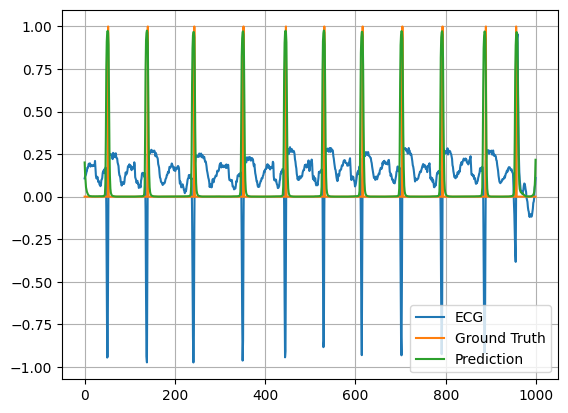

 68%|██████▊   | 136/200 [00:03<00:01, 42.84it/s]

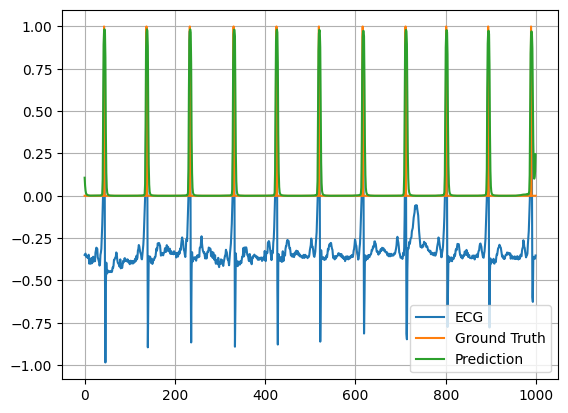

 78%|███████▊  | 157/200 [00:04<00:01, 38.66it/s]

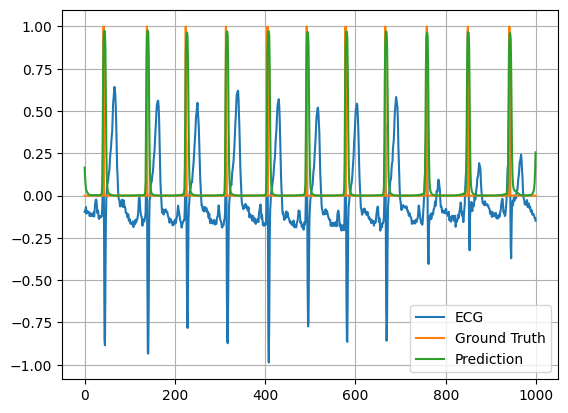

 90%|████████▉ | 179/200 [00:04<00:00, 34.45it/s]

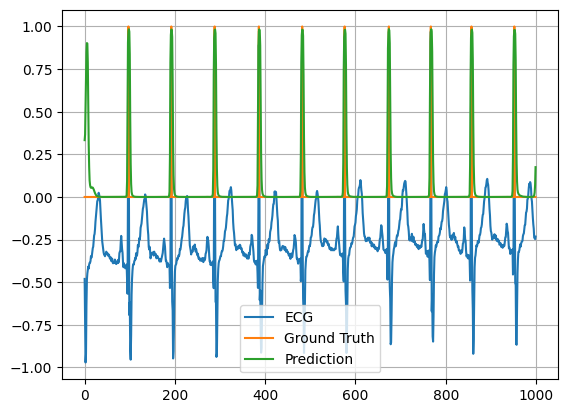

100%|██████████| 200/200 [00:05<00:00, 36.32it/s]



Test Loss: 0.0031
Test Accuracy: 98.00152 %
Test F1 Score: 0.27124
Test TPR: 0.98002
Test FPR: 0.06619



In [16]:
model.test_model(x_test=x_test, y_test=y_test, plot=True)

### Testing on the PTB-XL dataset

In [48]:
from customLib.load_physionet_ecgs import load_physionet_ecgs
from customLib.dataset import split_dataset
from customLib.preprocess import resample_signal, downsample_r_peaks_probability

In [50]:
x, y = load_physionet_ecgs(path=mitbih_path, force_new=True, window_in_seconds=10, expand=False)

100%|██████████| 44/44 [00:09<00:00,  4.51it/s]


In [51]:
res_x = []
res_y = []

for i in range(x.shape[0]):
  res_x.append(resample_signal(x[i], 1000))

for i in range(y.shape[0]):
 res_y.append(downsample_r_peaks_probability(r_peaks_probability=y[i], original_fs=360, target_fs=100))

#res_y = expand_labels(res_y, left_shift=5, right_shift=6)
res_x = np.array(res_x)
res_y = np.array(res_y)

In [52]:
x_train, y_train, x_test, y_test, x_val, y_val = split_dataset(x=res_x, y=res_y, is_validation_set=True, path=(mitbih_path))

Total ECGs: 15840


In [53]:
print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)

print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

print("X val shape: ", x_val.shape)
print("Y val shape: ", y_val.shape)

X train shape:  (12672, 1000)
Y train shape:  (12672, 1000)
X test shape:  (3168, 1000)
Y test shape:  (3168, 1000)
X val shape:  (1584, 1000)
Y val shape:  (1584, 1000)


In [ ]:
x_train = np.expand_dims(x_train, 1)[:8000]
y_train = np.expand_dims(y_train, 1)[:8000]

x_test = np.expand_dims(x_test, 1)[:2000]
y_test = np.expand_dims(y_test, 1)[:2000]

x_val = np.expand_dims(x_val, 1)[:1000]
y_val = np.expand_dims(y_val, 1)[:1000]

In [56]:
model.train_model(x_train, y_train, epochs=10, x_val=x_val, y_val=y_val, batch_size=20)

100%|██████████| 400/400 [01:53<00:00,  3.52it/s]


====Epoch [1/10]====

Train Loss: 0.0330
Train Accuracy: 19.27260 %
Train F1 Score: 0.28836
Train TPR: 0.19273
Train FPR: 0.00167



100%|██████████| 50/50 [00:01<00:00, 41.42it/s]



Validation Loss: 0.0361
Validation Accuracy: 30.88839 %
Validation F1 Score: 0.41374
Validation TPR: 0.30888
Validation FPR: 0.00241



100%|██████████| 400/400 [01:53<00:00,  3.52it/s]


====Epoch [2/10]====

Train Loss: 0.0284
Train Accuracy: 33.21127 %
Train F1 Score: 0.45042
Train TPR: 0.33211
Train FPR: 0.00165



100%|██████████| 50/50 [00:01<00:00, 41.76it/s]



Validation Loss: 0.0335
Validation Accuracy: 34.45899 %
Validation F1 Score: 0.47217
Validation TPR: 0.34459
Validation FPR: 0.00150



100%|██████████| 400/400 [01:53<00:00,  3.53it/s]


====Epoch [3/10]====

Train Loss: 0.0271
Train Accuracy: 35.54800 %
Train F1 Score: 0.47806
Train TPR: 0.35548
Train FPR: 0.00153



100%|██████████| 50/50 [00:01<00:00, 40.84it/s]



Validation Loss: 0.0330
Validation Accuracy: 38.00635 %
Validation F1 Score: 0.49853
Validation TPR: 0.38006
Validation FPR: 0.00189



100%|██████████| 400/400 [01:53<00:00,  3.52it/s]


====Epoch [4/10]====

Train Loss: 0.0265
Train Accuracy: 39.41494 %
Train F1 Score: 0.50839
Train TPR: 0.39415
Train FPR: 0.00181



100%|██████████| 50/50 [00:01<00:00, 41.80it/s]



Validation Loss: 0.0295
Validation Accuracy: 36.79033 %
Validation F1 Score: 0.49174
Validation TPR: 0.36790
Validation FPR: 0.00168



100%|██████████| 400/400 [01:53<00:00,  3.52it/s]


====Epoch [5/10]====

Train Loss: 0.0253
Train Accuracy: 40.01766 %
Train F1 Score: 0.51560
Train TPR: 0.40018
Train FPR: 0.00176



100%|██████████| 50/50 [00:01<00:00, 43.43it/s]



Validation Loss: 0.0290
Validation Accuracy: 38.81187 %
Validation F1 Score: 0.51214
Validation TPR: 0.38812
Validation FPR: 0.00167



100%|██████████| 400/400 [01:53<00:00,  3.52it/s]


====Epoch [6/10]====

Train Loss: 0.0245
Train Accuracy: 42.65411 %
Train F1 Score: 0.53988
Train TPR: 0.42654
Train FPR: 0.00178



100%|██████████| 50/50 [00:01<00:00, 42.55it/s]



Validation Loss: 0.0299
Validation Accuracy: 35.73697 %
Validation F1 Score: 0.48753
Validation TPR: 0.35737
Validation FPR: 0.00142



100%|██████████| 400/400 [01:56<00:00,  3.44it/s]


====Epoch [7/10]====

Train Loss: 0.0240
Train Accuracy: 43.25246 %
Train F1 Score: 0.54700
Train TPR: 0.43252
Train FPR: 0.00173



100%|██████████| 50/50 [00:01<00:00, 43.43it/s]



Validation Loss: 0.0282
Validation Accuracy: 39.39277 %
Validation F1 Score: 0.51824
Validation TPR: 0.39393
Validation FPR: 0.00165



100%|██████████| 400/400 [01:53<00:00,  3.52it/s]


====Epoch [8/10]====

Train Loss: 0.0232
Train Accuracy: 45.93796 %
Train F1 Score: 0.57407
Train TPR: 0.45938
Train FPR: 0.00164



100%|██████████| 50/50 [00:01<00:00, 45.60it/s]



Validation Loss: 0.0293
Validation Accuracy: 41.14321 %
Validation F1 Score: 0.52829
Validation TPR: 0.41143
Validation FPR: 0.00191



100%|██████████| 400/400 [01:52<00:00,  3.57it/s]


====Epoch [9/10]====

Train Loss: 0.0233
Train Accuracy: 45.53252 %
Train F1 Score: 0.56971
Train TPR: 0.45533
Train FPR: 0.00166



100%|██████████| 50/50 [00:01<00:00, 41.25it/s]



Validation Loss: 0.0295
Validation Accuracy: 42.80846 %
Validation F1 Score: 0.53525
Validation TPR: 0.42808
Validation FPR: 0.00224



100%|██████████| 400/400 [01:53<00:00,  3.52it/s]


====Epoch [10/10]====

Train Loss: 0.0222
Train Accuracy: 47.45619 %
Train F1 Score: 0.59038
Train TPR: 0.47456
Train FPR: 0.00154



100%|██████████| 50/50 [00:01<00:00, 43.18it/s]



Validation Loss: 0.0281
Validation Accuracy: 42.40570 %
Validation F1 Score: 0.52807
Validation TPR: 0.42406
Validation FPR: 0.00238



  0%|          | 0/200 [00:00<?, ?it/s]

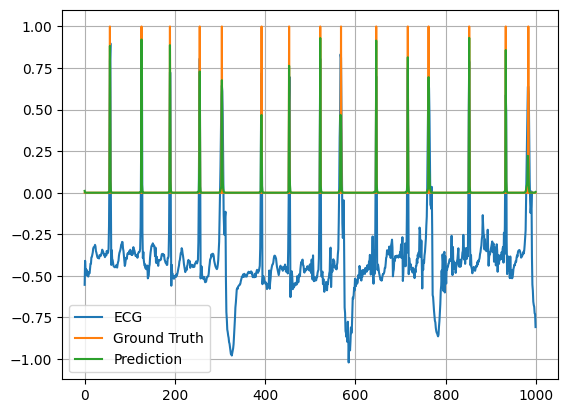

 10%|█         | 20/200 [00:00<00:04, 44.72it/s]

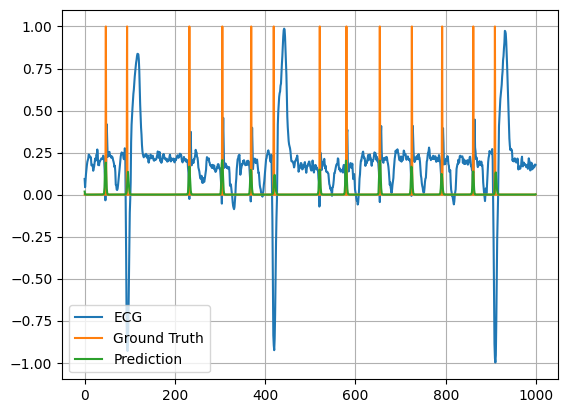

 18%|█▊        | 37/200 [00:01<00:03, 44.43it/s]

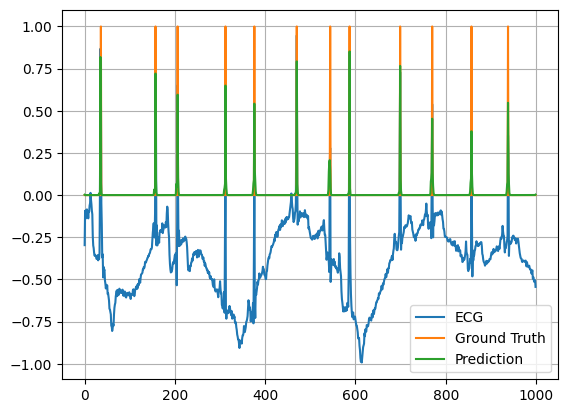

 30%|███       | 60/200 [00:01<00:02, 47.80it/s]

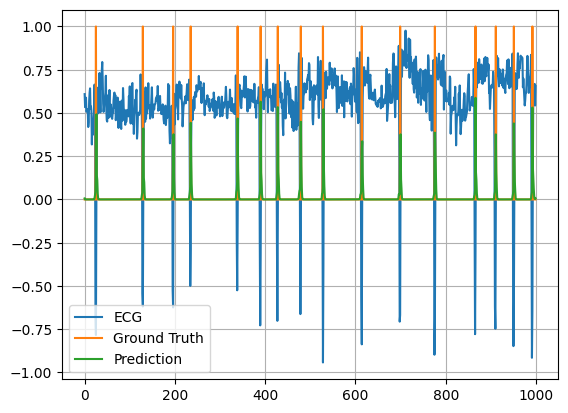

 39%|███▉      | 78/200 [00:02<00:02, 42.48it/s]

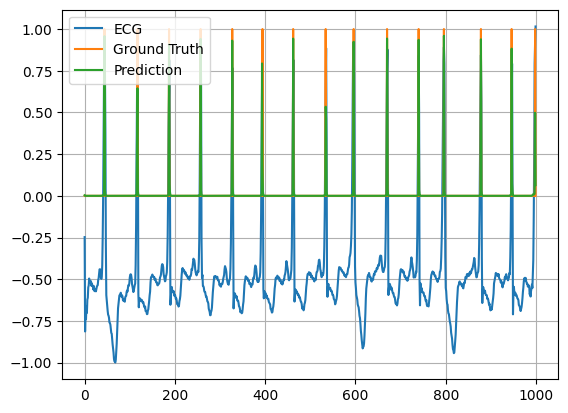

 48%|████▊     | 95/200 [00:02<00:02, 42.48it/s]

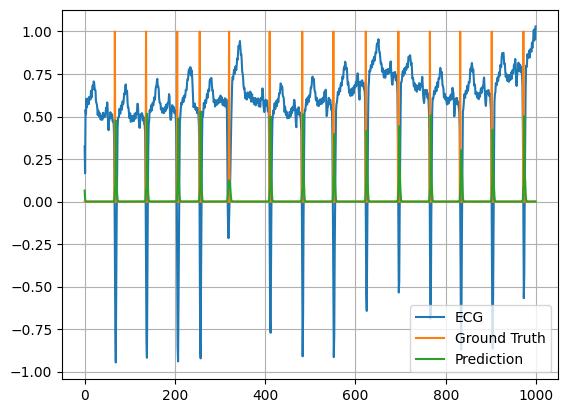

 60%|█████▉    | 119/200 [00:03<00:01, 45.34it/s]

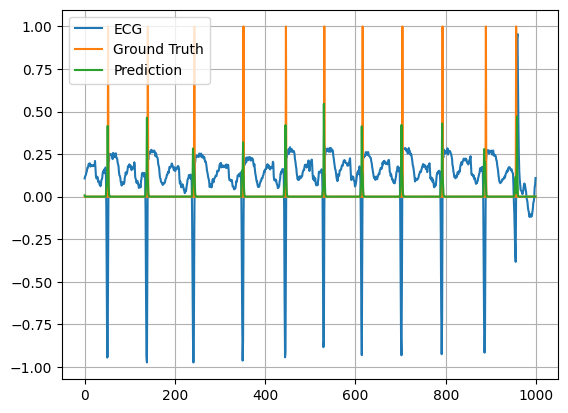

 68%|██████▊   | 136/200 [00:03<00:01, 44.11it/s]

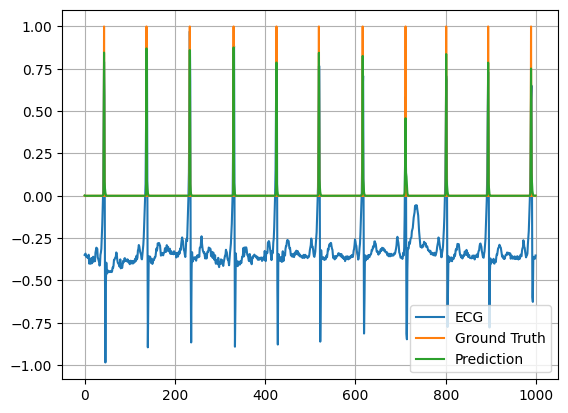

 79%|███████▉  | 158/200 [00:04<00:00, 45.87it/s]

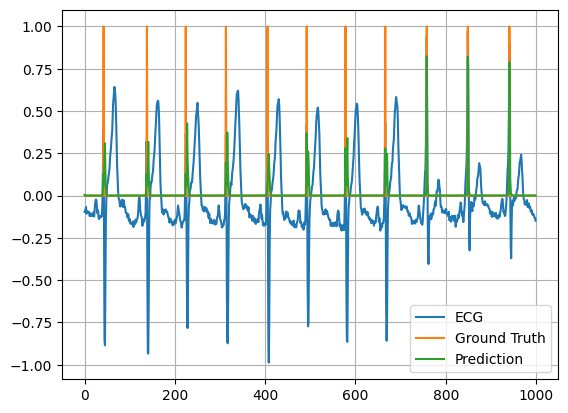

 90%|█████████ | 180/200 [00:04<00:00, 46.72it/s]

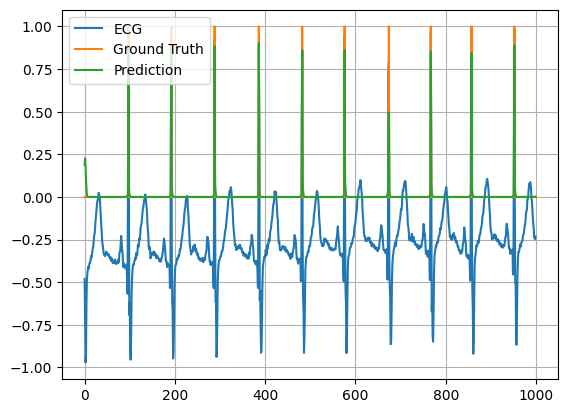

100%|██████████| 200/200 [00:05<00:00, 39.89it/s]



Test Loss: 0.0252
Test Accuracy: 41.50648 %
Test F1 Score: 0.54065
Test TPR: 0.41506
Test FPR: 0.00152



In [57]:
model.test_model(x_test, y_test, plot=True)

### Notes
The ST_RES_NET output layer is Conv1D layer instead of the Dense layer, proposed in the original paper. The number of filters, kernel size, and strides in the Conv1D layer were adjusted to match the number of outpus samples in the original signal.

The Linear / Dense layer resulted in a poor performance during training on both MITBIH and Apnea-ecg datasets. I did not investigate further this issue.

Also the ST_RES_NET model's performance has improved when the loss function has been changed from BCELoss to WeightedBCELoss with class weights. The class weights are calculated based on the distribution of the labels.